## Assignment 2: Time Series Forecasting

### your name, your id, Version NN

#### Follow detail instructions in the assignment specification and use these heading for implementation and discussion

### 1. Paper evaluation

(Candanedo, LM, Feldheim, V & Deramaix, D 2017, 'Data driven prediction models of energy use of appliances in a low-energy house', Energy and buildings, vol. 140, pp. 81-97.)
https://myuni.adelaide.edu.au/courses/105130/files/16388685?wrap=1

### MODELS USED AND WHAT THEY PREDICT

#### Multiple Linear Regression (LM)
The multiple linear regression method requires energy consumption to display linear relationships with its predictor variables.
what it predicts:
Predicted energy utilization patterns depend on temperature levels together with humidity conditions and meteorological indicators.
The model identifies direct relationships which exist between energy consumption and its contributing factors.
The high variability of energy consumption leads linear regression to produce suboptimal results for this kind of analysis.

A Support Vector Machine (SVM) utilizes Radial Basis Function (RBF) Kernel for its operation.

The underlying algorithm of SVM regression creates optimal hyperplane fitting that reduces data prediction mistakes.
Data passes through Radial Basis Function (RBF) kernel to map into a higher-dimensional space which enables it to deal with non-linear patterns.
The model optimizes the relationship between model complexity and the margin of error.
What It Predicts:
More complex, non-linear relationships between energy consumption and predictors.
The system records energy changes which depend both on room environmental conditions and outside weather conditions.
The system consumes more energy throughout the day during early and late periods.

#### Random Forest (RF)

The ensemble learning approach called Random Forest develops numerous decision trees to achieve its purpose.
The training process divides the data into subsets which helps prevent the model from overfitting when building several decision trees.
The conclusion prediction combines all the individual decision tree outputs using an average.
What It Predicts:
Complex, non-linear relationships in energy consumption.
The feature importance rankings system functions as a tool to locate the key determinants such as time of day and indoor humidity and pressure.
Higher accuracy for time-dependent energy usage patterns.

#### Gradient Boosting Machines (GBM)

GBM acts as an ensemble which combines multiple decision trees just like Random Forest.
It iteratively enhances weak learners until errors reach their minimum point as a substitute for independent tree training.
The system incorporates new trees that fix errors present in the existing tree models.
What It Predicts:
Most accurate energy consumption predictions.
Complex, highly non-linear relationships between features and energy usage.
Gradual changes in energy demand (such as unexpected appliance use) do not affect this capability.

### How does this compare to your forecasting task?

1. The comparison between Multiple Linear Regression (MLR) and Time Series Models exists in the current analysis.
MLR functions by assuming that the independent variables have a direct linear effect on the target variable.
MLR present challenges as a forecasting tool when used alone due to its absence of built-in time-dependent modeling capabilities.
The models ARIMA/SARIMA contain specific features that directly detect patterns of trends and seasonality within time sequence data.

2. Time Series Models face comparison with an SVM using RBF Kernel.
The RBF kernel of SVM provides ability to detect non-linear associations between predictors to target variables.
The model lacks built-in time-dependency modeling capabilities which affects its ability to forecast sequences effectively.
Immature patterns can be better identified by LSTM/GRU models because they extract chronological interdependencies effectively.

3. Random Forest operates against Time Series Models in solution comparison.
RF demonstrates strong capability to identify intricate variables and their respective relationships in addition to feature significance.
RF fails to work with time-dependent relationships on its own.
Random Forest requires lag-based feature engineering for integration but performance improves when using either CNNs or LSTMs for sequential forecasting.

4. The choice between Time Series Models and Gradient Boosting Machines (GBM) protects time series forecasts.
GBM sends accurate results for structured information while maintaining excellent capability to analyze intricate data connections.
The model lacks built-in time series dependency features but adds lag features during adaptation.
LSTMs provide better sequence-based forecasting than XGBoost but one can employ XGBoost with lag-based features for interpretability when necessary.


### What can or cannot be used for your forecasting task and why?
 
1. Feature Selection and Importance Ranking
The paper applies Boruta feature selection together with Recursive Feature Elimination (RFE) to determine significant predictors.
You can use this method to choose appropriate features for your forecasting process.

2. Exploratory Data Analysis (EDA) & Visualization
This research presents comprehensive details about variable correlation evaluation and their corresponding visual representations in pairwise plots.
Likewise you should apply related methods to find the seasonal patterns and identify underlying trends and detect relationships within your time series information.

3. Time-Based Feature Engineering
The study develops various timing characteristics which include number of seconds from midnight (NSM) combined with week status and day of the week.
The same transformation logic can raise the performance quality of time series models when applied.

4. Data Preprocessing Methods
Handling missing values using interpolation.
Data normalization and scaling.
A statistical approach determines which features and characteristics should be included in the analysis.

5. Machine Learning Models for Forecasting
The paper utilizes multiple linear regression as well as support vector machines (SVM) and random forests (RF) and gradient boosting machines (GBM).
RF and GBM can function as time series forecasting tools alongside the standard forecasting models ARIMA and SARIMA although they share a different conceptual foundation.

6. Model Evaluation Metrics
The research utilizes Root Mean Squared Error (RMSE) together with R-squared (R²) and Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE) as evaluation criteria.
The metrics you implemented for evaluating your forecasts must match those used for model assessment.

7. Multivariate Modeling
This paper examines how temperature patterns and relative humidity and weather patterns affect power consumption rates.
The models LSTM, GRU and CNN are recommended to analyze datasets containing additional features including extreme weather events.

what i cannot use:

1. Direct Use of Energy Prediction Models
Energy consumption prediction stands as the main subject of investigation in this paper while your project deals with time series forecasting.
GBM and Random Forest models lack built-in functions that detect temporal dependencies which ARIMA, SARIMA and LSTM and other models possess.
Model adaptation allows these frameworks to serve as forecasting tools when you incorporate either lagged variables or sequence modeling methods.

2. Domain-Specific Features Related to Energy Use
The study analyzes three different variables which include power usage of appliances as well as room conditions and light usage.
Your dataset needs matchable environmental factors for these variables to become significant to your forecasting process.

3. Weather Station Data Interpretation
The study draws its weather data from an airport station located externally.
The approach does not apply to you since your dataset lacks weather measurement variables.

4. Regression-Based Models as Primary Forecasting Methods
The paper primarily utilizes regression models as its basis including MLR, SVM, RF, and GBM.
Time series forecasting models do not inherently exist within these models since they fail to track temporal dependencies within datasets.
For producing forecasts you must begin with time-sensitive forecasting approaches that include ARIMA, SARIMA, LSTM or GRU.


### 2. Analyse and visualise the Time Series

In [1]:
import pandas as pd
df = pd.read_csv("energydata_complete.csv")
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,14/02/2016 0:00,50,10,21.790000,39.900000,20.100000,40.790000,21.390000,40.590000,19.2,...,18.0,41.933333,2.90,732.90,98.000000,2.000000,31.000000,2.6,48.320978,48.320978
1,14/02/2016 0:10,50,0,21.790000,39.900000,20.033333,40.730000,21.390000,40.590000,19.2,...,18.0,42.133333,2.87,732.95,98.166667,2.166667,28.500000,2.6,33.339359,33.339359
2,14/02/2016 0:20,60,10,21.700000,39.933333,19.890000,40.790000,21.390000,40.530000,19.2,...,18.0,42.360000,2.83,733.00,98.333333,2.333333,26.000000,2.6,8.168115,8.168115
3,14/02/2016 0:30,40,0,21.633333,39.860000,19.890000,40.790000,21.390000,40.590000,19.2,...,18.0,42.633333,2.80,733.05,98.500000,2.500000,23.500000,2.6,16.197509,16.197509
4,14/02/2016 0:40,60,10,21.600000,39.900000,19.790000,40.790000,21.390000,40.590000,19.1,...,18.0,42.860000,2.77,733.10,98.666667,2.666667,21.000000,2.6,12.559574,12.559574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14936,27/05/2016 17:20,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,...,23.2,46.790000,22.70,755.20,55.666667,3.333333,23.666667,13.3,43.096812,43.096812
14937,27/05/2016 17:30,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,...,23.2,46.790000,22.60,755.20,56.000000,3.500000,24.500000,13.3,49.282940,49.282940
14938,27/05/2016 17:40,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,...,23.2,46.790000,22.50,755.20,56.333333,3.666667,25.333333,13.3,29.199117,29.199117
14939,27/05/2016 17:50,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,...,23.2,46.817500,22.30,755.20,56.666667,3.833333,26.166667,13.2,6.322784,6.322784


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14941 entries, 0 to 14940
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         14941 non-null  object 
 1   Appliances   14941 non-null  int64  
 2   lights       14941 non-null  int64  
 3   T1           14941 non-null  float64
 4   RH_1         14941 non-null  float64
 5   T2           14941 non-null  float64
 6   RH_2         14941 non-null  float64
 7   T3           14941 non-null  float64
 8   RH_3         14941 non-null  float64
 9   T4           14941 non-null  float64
 10  RH_4         14941 non-null  float64
 11  T5           14941 non-null  float64
 12  RH_5         14941 non-null  float64
 13  T6           14941 non-null  float64
 14  RH_6         14941 non-null  float64
 15  T7           14941 non-null  float64
 16  RH_7         14941 non-null  float64
 17  T8           14941 non-null  float64
 18  RH_8         14941 non-null  float64
 19  T9  

In [3]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,14941.000000,14941.000000,14941.000000,14941.000000,14941.000000,14941.000000,14941.000000,14941.000000,14941.000000,14941.000000,...,14941.000000,14941.000000,14941.000000,14941.000000,14941.000000,14941.000000,14941.000000,14941.000000,14941.000000,14941.000000
mean,96.747206,3.235393,22.030776,39.418672,20.519140,39.935868,22.770465,38.046386,21.425985,37.701517,...,20.143157,40.454742,8.182569,755.575393,77.559434,3.671039,37.922696,4.055227,25.047636,25.047636
std,97.297111,7.296554,1.469766,3.880367,2.322643,4.328421,1.897689,2.530175,1.843571,3.701348,...,1.782497,3.566295,5.464633,6.613943,15.720014,2.218070,11.415145,4.220123,14.436670,14.436670
min,10.000000,0.000000,18.600000,27.023333,16.200000,20.463333,19.100000,28.766667,17.290000,27.660000,...,17.260000,29.166667,-4.400000,732.900000,24.000000,0.000000,1.000000,-6.100000,0.005322,0.005322
25%,50.000000,0.000000,21.000000,36.790000,18.890000,37.260000,21.390000,36.363333,20.100000,34.900000,...,18.571429,38.030000,4.230000,751.200000,66.666667,2.000000,29.000000,0.983000,12.593007,12.593007
50%,60.000000,0.000000,21.823333,38.790000,20.000000,39.900000,22.566667,37.760000,21.166667,37.200000,...,20.000000,39.863333,7.630000,755.700000,80.833333,3.166667,40.000000,3.600000,25.120708,25.120708
75%,100.000000,0.000000,22.890000,41.400000,21.830000,42.700000,24.033333,39.260000,22.738571,39.700000,...,20.890000,42.530000,11.400000,760.200000,90.833333,5.000000,40.000000,6.900000,37.454428,37.454428
max,900.000000,50.000000,26.260000,57.496667,29.856667,56.026667,29.236000,47.693333,26.200000,50.760000,...,24.500000,51.536000,26.100000,772.300000,100.000000,13.000000,66.000000,15.500000,49.992758,49.992758


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-02-14 00:00:00,50,10,21.790000,39.900000,20.100000,40.790000,21.390000,40.590000,19.2,...,18.0,41.933333,2.90,732.90,98.000000,2.000000,31.000000,2.6,48.320978,48.320978
1,2016-02-14 00:10:00,50,0,21.790000,39.900000,20.033333,40.730000,21.390000,40.590000,19.2,...,18.0,42.133333,2.87,732.95,98.166667,2.166667,28.500000,2.6,33.339359,33.339359
2,2016-02-14 00:20:00,60,10,21.700000,39.933333,19.890000,40.790000,21.390000,40.530000,19.2,...,18.0,42.360000,2.83,733.00,98.333333,2.333333,26.000000,2.6,8.168115,8.168115
3,2016-02-14 00:30:00,40,0,21.633333,39.860000,19.890000,40.790000,21.390000,40.590000,19.2,...,18.0,42.633333,2.80,733.05,98.500000,2.500000,23.500000,2.6,16.197509,16.197509
4,2016-02-14 00:40:00,60,10,21.600000,39.900000,19.790000,40.790000,21.390000,40.590000,19.1,...,18.0,42.860000,2.77,733.10,98.666667,2.666667,21.000000,2.6,12.559574,12.559574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14936,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,...,23.2,46.790000,22.70,755.20,55.666667,3.333333,23.666667,13.3,43.096812,43.096812
14937,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,...,23.2,46.790000,22.60,755.20,56.000000,3.500000,24.500000,13.3,49.282940,49.282940
14938,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,...,23.2,46.790000,22.50,755.20,56.333333,3.666667,25.333333,13.3,29.199117,29.199117
14939,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,...,23.2,46.817500,22.30,755.20,56.666667,3.833333,26.166667,13.2,6.322784,6.322784


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14941 entries, 0 to 14940
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         14941 non-null  datetime64[ns]
 1   Appliances   14941 non-null  int64         
 2   lights       14941 non-null  int64         
 3   T1           14941 non-null  float64       
 4   RH_1         14941 non-null  float64       
 5   T2           14941 non-null  float64       
 6   RH_2         14941 non-null  float64       
 7   T3           14941 non-null  float64       
 8   RH_3         14941 non-null  float64       
 9   T4           14941 non-null  float64       
 10  RH_4         14941 non-null  float64       
 11  T5           14941 non-null  float64       
 12  RH_5         14941 non-null  float64       
 13  T6           14941 non-null  float64       
 14  RH_6         14941 non-null  float64       
 15  T7           14941 non-null  float64       
 16  RH_7

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

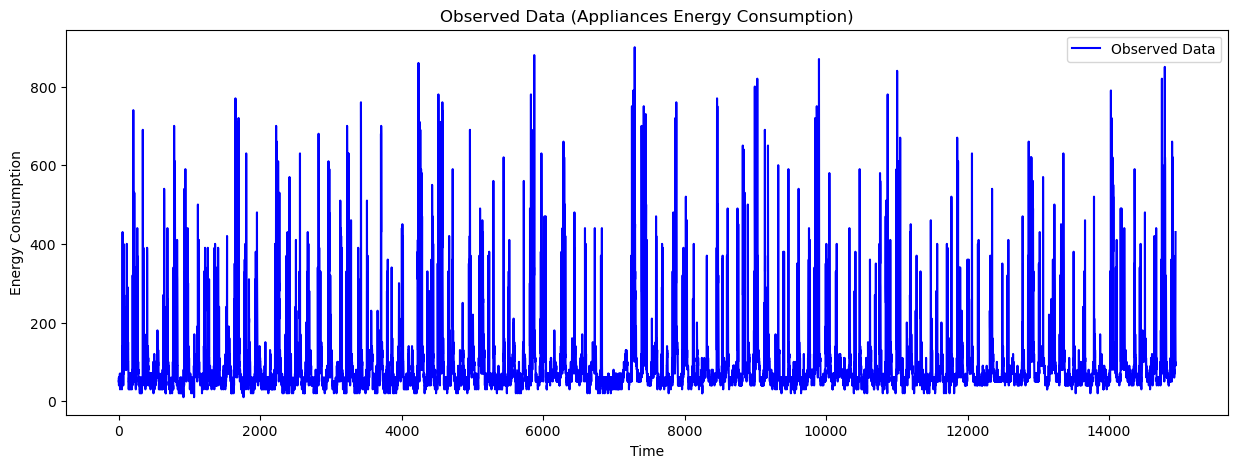

In [ ]:
decomposition = seasonal_decompose(df['Appliances'], period=144, model='additive')
plt.figure(figsize=(15, 5))
plt.plot(decomposition.observed, label='Observed Data', color='blue')
plt.title("Observed Data (Appliances Energy Consumption)")
plt.xlabel("Time")
plt.ylabel("Energy Consumption")
plt.legend()
plt.show()

1. Observed Data (First Graph)
What it shows:
The initial energy consumption measurements pertaining to appliances across time appear in the first graph. Date values appear on the x-axis then energy consumption stands as values on the y-axis. The points of elevated height in the graph indicate that energy consumption reached its peak during those intervals.
Interpretation:
The observed data presents significant fluctuations between high and low values in its measurements.
Energy consumption demonstrates recognizable consumption patterns through the spikes which can be daily or weekly.
Only by decomposing the data can researchers find a clear pattern because the initial graph alone reveals no specific direction.

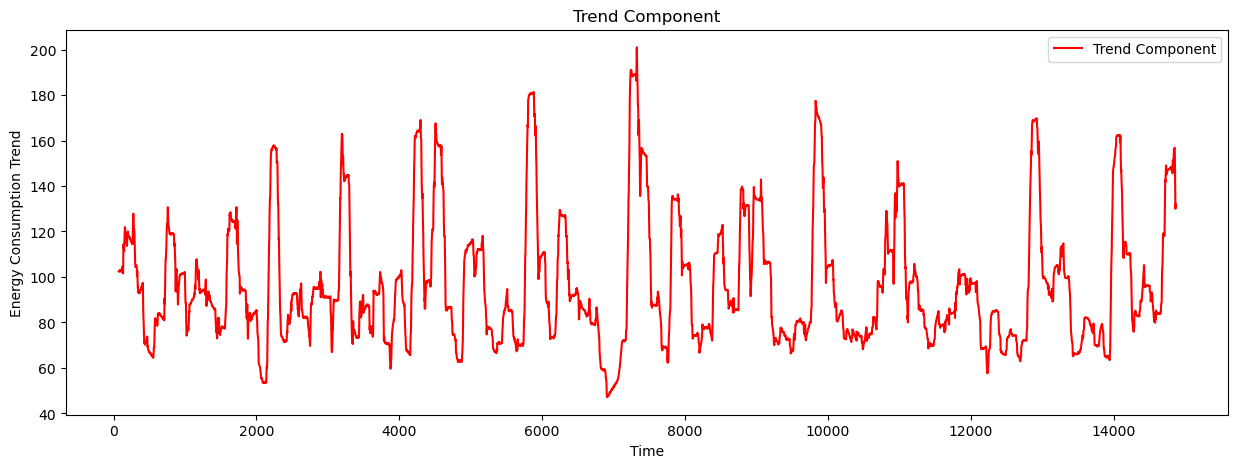

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(decomposition.trend, label='Trend Component', color='red')
plt.title("Trend Component")
plt.xlabel("Time")
plt.ylabel("Energy Consumption Trend")
plt.legend()
plt.show()

2. Trend Component (Second Graph)
What it shows:
The analyzed graph displays the extended pattern of energy utilization throughout time. After erasing short-term fluctuations and seasonality effects the trend emerges as a result.
Interpretation:
The energy consumption levels demonstrate ongoing changes that produce smooth varying upward and downward patterns throughout time.
Energy consumption reaches greater heights in specific intervals than it does in other times.
Future energy demands and user behavior patterns throughout time become easier to analyze through the process of trend identification.

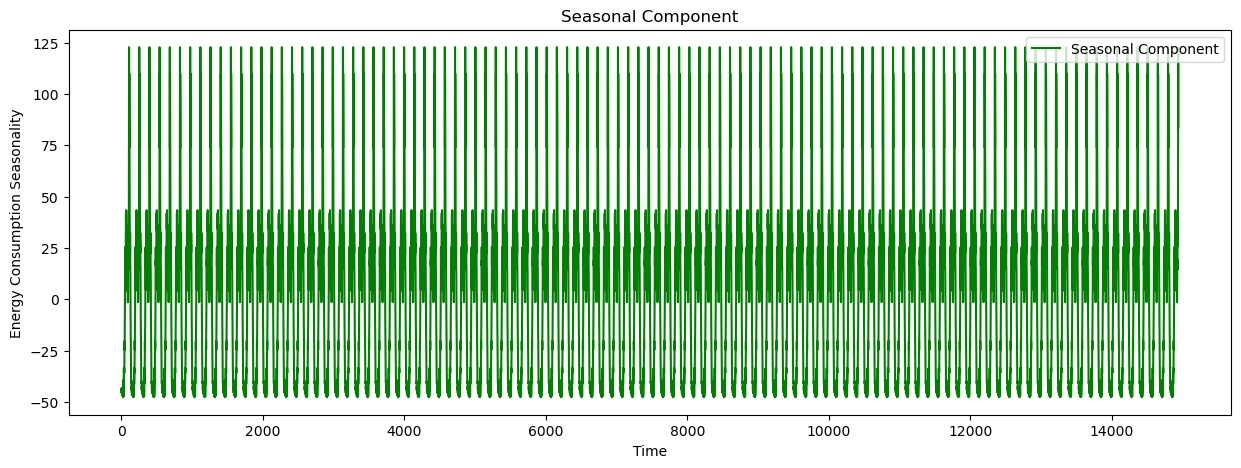

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(decomposition.seasonal, label='Seasonal Component', color='green')
plt.title("Seasonal Component")
plt.xlabel("Time")
plt.ylabel("Energy Consumption Seasonality")
plt.legend()
plt.show()

3. Seasonal Component (Third Graph)
What it shows:
The seasonal component separates recurring patterns which exist within the information. The natural cycles present in this graph result from seasonal patterns.
Interpretation:
The periodic patterns present in the data series demonstrate weekly or daily fluctuations of energy usage.
Energy requirements demonstrate a predictable cycle throughout time that mainly results from human daily operations.
The secortable component reveals the time ranges when energy consumption is highest and lowest.

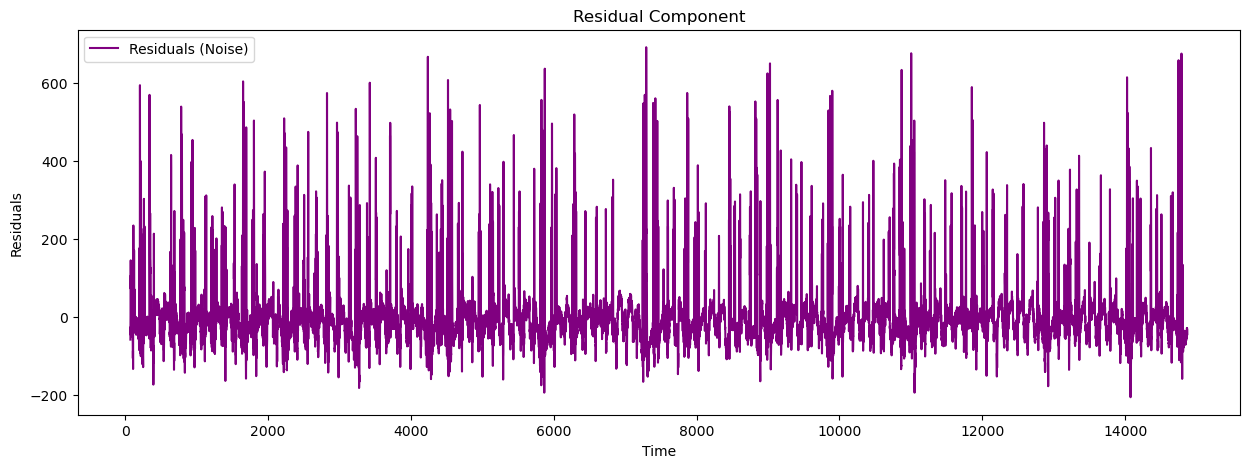

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(decomposition.resid, label='Residuals (Noise)', color='purple')
plt.title("Residual Component")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.legend()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14941 entries, 0 to 14940
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         14941 non-null  datetime64[ns]
 1   Appliances   14941 non-null  int64         
 2   lights       14941 non-null  int64         
 3   T1           14941 non-null  float64       
 4   RH_1         14941 non-null  float64       
 5   T2           14941 non-null  float64       
 6   RH_2         14941 non-null  float64       
 7   T3           14941 non-null  float64       
 8   RH_3         14941 non-null  float64       
 9   T4           14941 non-null  float64       
 10  RH_4         14941 non-null  float64       
 11  T5           14941 non-null  float64       
 12  RH_5         14941 non-null  float64       
 13  T6           14941 non-null  float64       
 14  RH_6         14941 non-null  float64       
 15  T7           14941 non-null  float64       
 16  RH_7

4. Residual Component (Fourth Graph)
What it shows:
After trend and seasonality extraction the residual part displays every random disruption or noise remaining in the data. It represents unpredictable variations.
Interpretation:
Fluctuations combined with high peaks indicate that certain energy usage patterns would not fit with either trend or seasonality patterns alone.
Random user behavior together with temperature changes and unexpected events cause external variations in the data.
A model should add new explanatory variables when the residual fluctuations are significant.



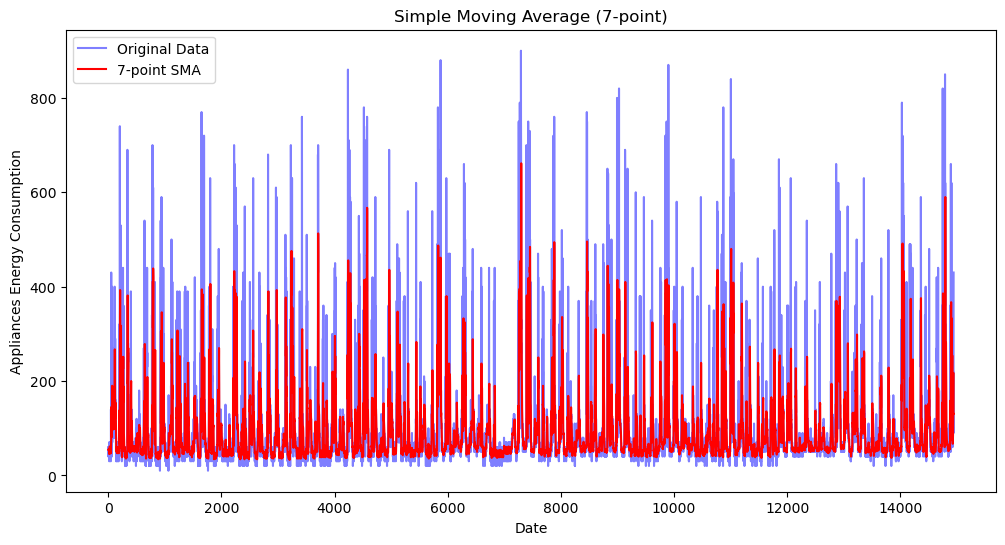

In [ ]:
window_size = 7
sma_values = df['Appliances'].rolling(window=window_size).mean()
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Appliances'], label='Original Data', color='blue', alpha=0.5)
plt.plot(df.index, sma_values, label=f'{window_size}-point SMA', color='red')
plt.xlabel('Date')
plt.ylabel('Appliances Energy Consumption')
plt.title(f'Simple Moving Average ({window_size}-point)')
plt.legend()
plt.show()

#### Simple Moving Average (SMA) (First Graph)

The displayed blue line contains the raw energy consumption measurements.
The red line shows the 7-time point Simple Moving Average (SMA) that diminishes data variations through seven-point value averaging.
The SMA functions to suppress quick changes in the data while displaying extended patterns. The data analysis trails the original information because sudden spike or decrease events occur.


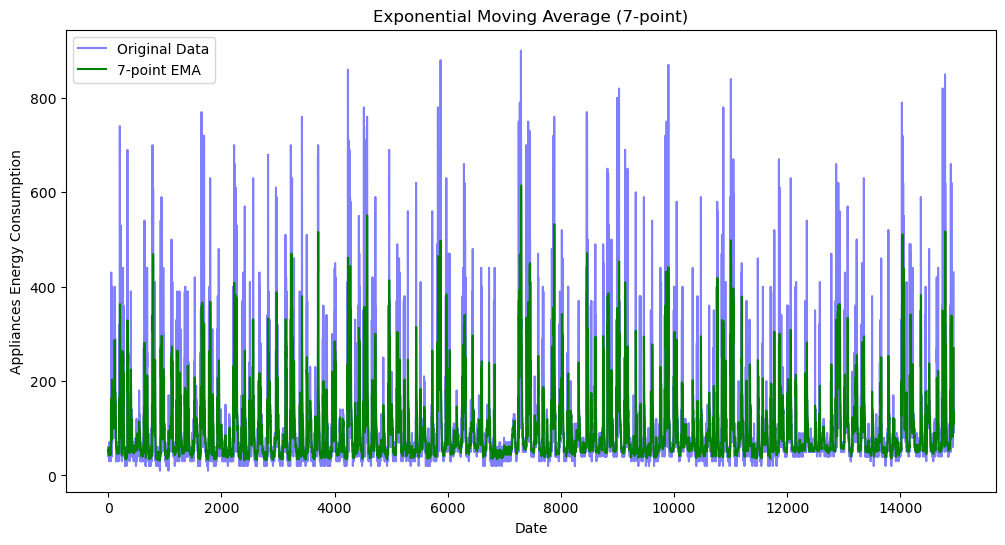

In [ ]:
window_size = 7
ema_values = df['Appliances'].ewm(span=window_size, adjust=False).mean()
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Appliances'], label='Original Data', color='blue', alpha=0.5)
plt.plot(df.index, ema_values, label=f'{window_size}-point EMA', color='green')
plt.xlabel('Date')
plt.ylabel('Appliances Energy Consumption')
plt.title(f'Exponential Moving Average ({window_size}-point)')
plt.legend()
plt.show()

#### Exponential Moving Average (EMA) (Second Graph)

The blue line shows the original measurements of energy consumption.
The green characteristic represents the 7-point Exponential Moving Average (EMA) because it applies greater value to recent observation points to improve its reaction speed to data modifications.
The Exponential Moving Average detects recent changes in the data with superior speed compared to Simple Moving Average. This calculation proves helpful since it finds trends both early and smoothes out random changes.

In [ ]:
from statsmodels.tsa.stattools import adfuller
def check_stationarity(timeseries):
    adf_test = adfuller(timeseries.dropna(), autolag='AIC')
    print("Results of Augmented Dickey-Fuller Test:")
    output = {
        'Test Statistic': adf_test[0],
        'p-value': adf_test[1],
        '# Lags Used': adf_test[2],
        '# Observations Used': adf_test[3]
    }
    
    for key, value in adf_test[4].items():
        output[f'Critical Value ({key})'] = value

    for k, v in output.items():
        print(f"{k}: {v}")

    if adf_test[1] < 0.05:
        print("\n The data is stationary (reject null hypothesis).")
    else:
        print("\n The data is NOT stationary (fail to reject null hypothesis). Consider differencing or transformation.")

check_stationarity(df['Appliances'])

Results of Augmented Dickey-Fuller Test:
Test Statistic: -17.916662310834845
p-value: 2.9162840540068577e-30
# Lags Used: 21
# Observations Used: 14919
Critical Value (1%): -3.430788395703419
Critical Value (5%): -2.861733751858642
Critical Value (10%): -2.5668731294512632

 The data is stationary (reject null hypothesis).


Automatic selection of the best lag value through the AIC criterion helps enhance accuracy in tests with the autolag='AIC' parameter.

Test Statistic: -17.916
The main indicator for stationarity assessment can be found in this value.
The series proves to be stationary when its value stands considerably below the critical thresholds.

p-value: 2.91e-30 (which is almost 0)
The p-value remains well below 0.05 thus leading to rejection of the null hypothesis.
The hypothesis under consideration establishes that the series exhibits a unit root indicating non-stationary behavior in the data.
Our data strongly supports the rejection of H₀ based on the very minimal p-value obtained.
The results indicate that your time series contains no unit roots which establishes its stationarity.

Lags Used: 21
The analysis utilized twenty-one lagged values so that autocorrelation effects could be eliminated from the test results.
observations Used: 14,919
The analysis used data from 14,919 observations that excluded the incorporated lagged time series values.

Critical Values:
1% level: -3.43
5% level: -2.86
10% level: -2.56

The computed Test Statistic (-17.916) falls below all critical values.
The test results prove that your time series displays strong stationarity at a 1% significance level.

Final Conclusion
our time series is stationary.
The data demonstrates a lack of unit root because the test statistic (-17.916) remains below all critical values while the p-value shows an extremely small value.

In [ ]:
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)
total_missing = df.isnull().sum().sum()
print("\nTotal Missing Values:", total_missing)

Missing Values in Each Column:
 date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

Total Missing Values: 0


Appliances     425
lights         378
T1               0
RH_1           123
T2             112
RH_2            87
T3              34
RH_3           116
T4               0
RH_4            83
T5               6
RH_5           477
T6              19
RH_6             0
T7               0
RH_7             9
T8               0
RH_8            14
T9               0
RH_9            46
T_out           50
Press_mm_hg     54
RH_out          66
Windspeed       93
Visibility      39
Tdewpoint        0
rv1              0
rv2              0
dtype: int64


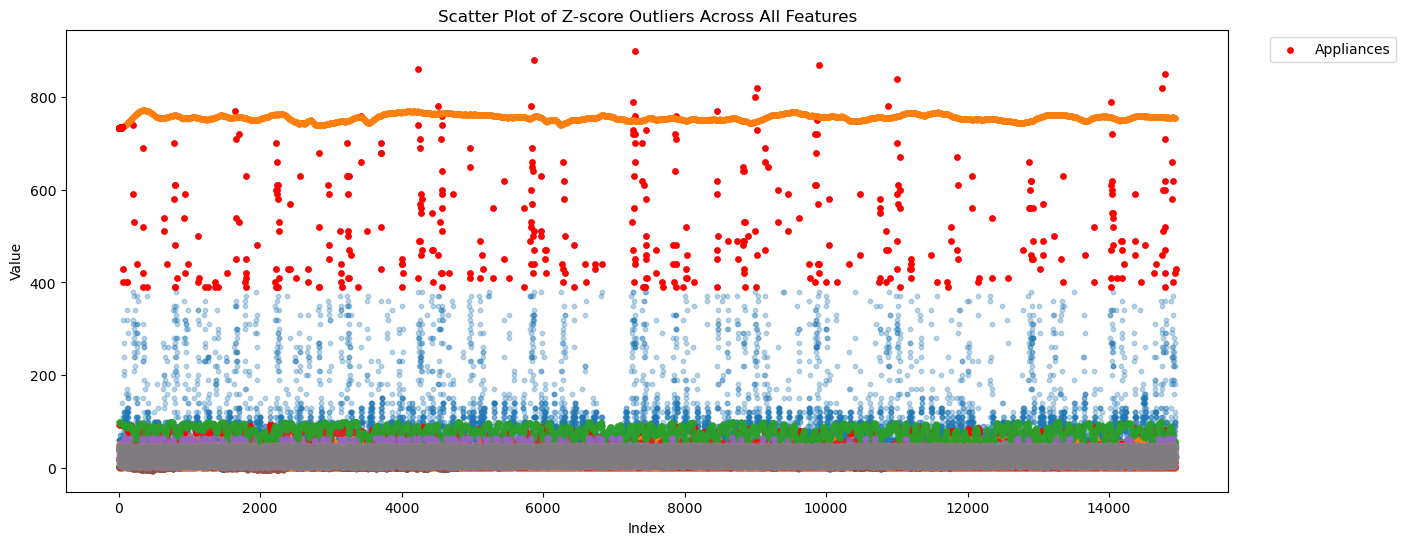

In [ ]:
import numpy as np
from scipy.stats import zscore

numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
z_scores = df[numeric_columns].apply(zscore)
z_outliers = (np.abs(z_scores) > 3)
print(z_outliers.sum())
plt.figure(figsize=(15, 6))
for column in numeric_columns:
    outlier_indices = df.index[z_outliers[column]]
    plt.scatter(df.index, df[column], s=10, alpha=0.3, label=None)
    plt.scatter(outlier_indices, df.loc[outlier_indices, column], 
                s=15, color='red', label=column if column in numeric_columns[:1] else "")

plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Scatter Plot of Z-score Outliers Across All Features")
plt.legend(loc="upper right", bbox_to_anchor=(1.15, 1))
plt.show()

IQR Method: Detects outliers based on the interquartile range (values outside 1.5 times the IQR).

Captures a larger range of outliers, including moderate deviations.

Z-score Method: Detects outliers based on standard deviations (e.g., values beyond ±3σ).

Focuses on extreme outliers, ignoring some moderate ones detected by IQR.

#### The outliers can be few points of high nergy consumption times or just the outliers. to have an idea of what thew outliers are we are going for the next step.

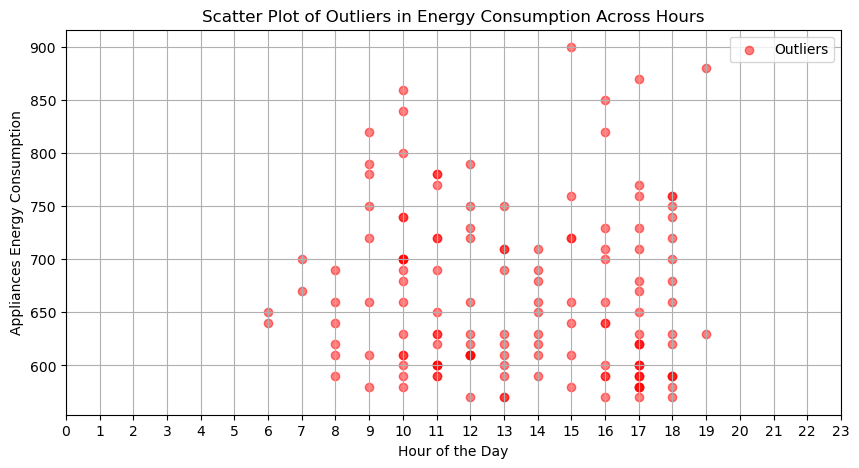

In [ ]:
df['hour'] = df['date'].dt.hour  

outliers = df[df['Appliances'] > df['Appliances'].quantile(0.99)].copy()
outliers['hour'] = outliers['date'].dt.hour

plt.figure(figsize=(10, 5))
plt.scatter(outliers['hour'], outliers['Appliances'], color='red', alpha=0.5, label='Outliers')
plt.xlabel("Hour of the Day")
plt.ylabel("Appliances Energy Consumption")
plt.title("Scatter Plot of Outliers in Energy Consumption Across Hours")
plt.xticks(range(0, 24))
plt.grid()
plt.legend()
plt.show()

Univariate Model - ARIMA
The model selection for this research became ARIMA (AutoRegressive Integrated Moving Average).
Justification:
AFD statistical analysis confirms data stationarity (establishes null hypothesis rejection) because this meets the best operating standards for ARIMA models.
The ARIMA model functions with one dependent variable (for instance temperature or stock price and other such similar data points) for time series forecasting.
Factors related to AIC values lead to selecting the most suitable ARIMA structure (p, d, q).

Multivariate Model - LSTM (Long Short-Term Memory).
The chosen model is LSTM because it serves as a time series Recurrent Neural Network.
Justification:
The forecasting algorithm LSTM becomes effective for predicting phenomena that require multiple interrelated variables.
LSTMs differ from ARIMA methods since they handle non-linear relationships and maintain a high performance with dependent variables.

### 3. Pre-process the data

In [ ]:
from scipy import stats
def impute_outliers_iqr(df, columns, method='median'):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        if method == 'median':
            median = df[col].median()
            df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = median
        elif method == 'mean':
            mean = df[col].mean()
            df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = mean

def impute_outliers_zscore(df, columns, threshold=3, method='median'):
    for col in columns:
        z_scores = np.abs(stats.zscore(df[col]))
        
        if method == 'median':
            median = df[col].median()
            df.loc[z_scores > threshold, col] = median
        elif method == 'mean':
            mean = df[col].mean()
            df.loc[z_scores > threshold, col] = mean

columns_to_check = df.columns.drop('date')

impute_outliers_iqr(df, columns_to_check, method='mean')

print("Data after outlier imputation:")
print(df)

Data after outlier imputation:
                     date  Appliances    lights         T1       RH_1  \
0     2016-02-14 00:00:00   50.000000  3.235393  21.790000  39.900000   
1     2016-02-14 00:10:00   50.000000  0.000000  21.790000  39.900000   
2     2016-02-14 00:20:00   60.000000  3.235393  21.700000  39.933333   
3     2016-02-14 00:30:00   40.000000  0.000000  21.633333  39.860000   
4     2016-02-14 00:40:00   60.000000  3.235393  21.600000  39.900000   
...                   ...         ...       ...        ...        ...   
14936 2016-05-27 17:20:00  100.000000  0.000000  25.566667  46.560000   
14937 2016-05-27 17:30:00   90.000000  0.000000  25.500000  46.500000   
14938 2016-05-27 17:40:00   96.747206  3.235393  25.500000  46.596667   
14939 2016-05-27 17:50:00   96.747206  3.235393  25.500000  46.990000   
14940 2016-05-27 18:00:00   96.747206  3.235393  25.500000  46.600000   

              T2       RH_2         T3       RH_3    T4  ...       RH_9  \
0      20.100000 

In [ ]:
from scipy.stats import mstats
def winsorize_column(column, lower_limit=0.05, upper_limit=0.95):
    return mstats.winsorize(column, limits=(lower_limit, 1 - upper_limit))

columns_to_winsorize = ['Appliances', 'RH_5', 'RH_out', 'Visibility']
for col in columns_to_winsorize:
    df[col] = winsorize_column(df[col])

print("Data after Winsorization:")
print(df)

Data after Winsorization:
                     date  Appliances    lights         T1       RH_1  \
0     2016-02-14 00:00:00   50.000000  3.235393  21.790000  39.900000   
1     2016-02-14 00:10:00   50.000000  0.000000  21.790000  39.900000   
2     2016-02-14 00:20:00   60.000000  3.235393  21.700000  39.933333   
3     2016-02-14 00:30:00   40.000000  0.000000  21.633333  39.860000   
4     2016-02-14 00:40:00   60.000000  3.235393  21.600000  39.900000   
...                   ...         ...       ...        ...        ...   
14936 2016-05-27 17:20:00  100.000000  0.000000  25.566667  46.560000   
14937 2016-05-27 17:30:00   90.000000  0.000000  25.500000  46.500000   
14938 2016-05-27 17:40:00   96.747206  3.235393  25.500000  46.596667   
14939 2016-05-27 17:50:00   96.747206  3.235393  25.500000  46.990000   
14940 2016-05-27 18:00:00   96.747206  3.235393  25.500000  46.600000   

              T2       RH_2         T3       RH_3    T4  ...       RH_9  \
0      20.100000  40.7

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


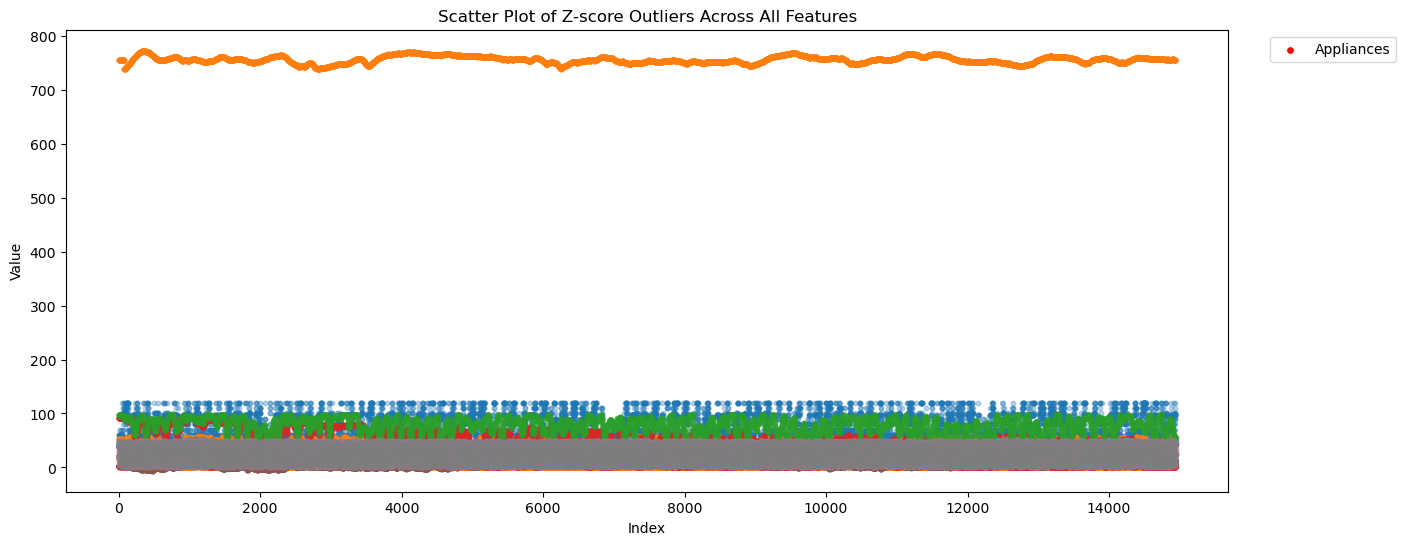

In [ ]:
z_scores = df[numeric_columns].apply(zscore)

z_outliers = (np.abs(z_scores) > 3)

print(z_outliers.sum())

plt.figure(figsize=(15, 6))

for column in numeric_columns:

    outlier_indices = df.index[z_outliers[column]]
    plt.scatter(df.index, df[column], s=10, alpha=0.3, label=None)
    plt.scatter(outlier_indices, df.loc[outlier_indices, column], 
                s=15, color='red', label=column if column in numeric_columns[:1] else "")

plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Scatter Plot of Z-score Outliers Across All Features")
plt.legend(loc="upper right", bbox_to_anchor=(1.15, 1))
plt.show()

The computation of the mean becomes highly affected by extreme values regardless of their minimal number.
The median remains less affected by extreme values because its calculation focuses solely on the middle values without being influenced by numerical magnitudes of every observation.

When imputing missing values with median statistics both central position and data range remain unchanged. The imputation process preserves original distribution patterns such that major outliers will continue to exist as outliers.

The mean-based imputation method includes extreme values during calculation so it moves the central value respectively. This affects skewed data. Mean imputation creates a perception that outliers are further away from other data points thus diminishing their effects on the data analysis.

The alteration of central tendency through this method does not correct the data because it merely accepts the outlier effect.


In [ ]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler(feature_range=(-1, 1))
df[numeric_columns] = scaler_minmax.fit_transform(df[numeric_columns])
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Windspeed,Visibility,Tdewpoint,rv1,rv2,hour,year,month,day,minute
0,2016-02-14 00:00:00,-0.75,1.0,-0.101408,0.078808,-0.222798,0.073006,-0.485228,0.478519,-0.571268,...,-0.578947,-0.28,-0.194444,0.933112,0.933112,0,2016,2,14,0
1,2016-02-14 00:10:00,-0.75,-1.0,-0.101408,0.078808,-0.236083,0.067469,-0.485228,0.478519,-0.571268,...,-0.543860,-0.48,-0.194444,0.333697,0.333697,0,2016,2,14,10
2,2016-02-14 00:20:00,-0.50,1.0,-0.126761,0.082465,-0.264647,0.073006,-0.485228,0.468119,-0.571268,...,-0.508772,-0.68,-0.194444,-0.673406,-0.673406,0,2016,2,14,20
3,2016-02-14 00:30:00,-1.00,-1.0,-0.145540,0.074419,-0.264647,0.073006,-0.485228,0.478519,-0.571268,...,-0.473684,-0.88,-0.194444,-0.352150,-0.352150,0,2016,2,14,30
4,2016-02-14 00:40:00,-0.50,1.0,-0.154930,0.078808,-0.284576,0.073006,-0.485228,0.478519,-0.593715,...,-0.438596,-1.00,-0.194444,-0.497704,-0.497704,0,2016,2,14,40


In [ ]:
df.drop('date', axis=1, inplace=True)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

X = df.drop('Appliances', axis=1)
y = df['Appliances']

lasso = Lasso(alpha=0.01)  
lasso.fit(X, y)

model = SelectFromModel(lasso, prefit=True)
X_lasso_selected = model.transform(X)

selected_features_lasso = X.columns[model.get_support()]
print("Selected features using Lasso Regularization:\n", selected_features_lasso)

Selected features using Lasso Regularization:
 Index(['lights', 'RH_1', 'T6', 'T8', 'RH_8', 'Press_mm_hg', 'RH_out',
       'Windspeed', 'hour', 'month', 'day', 'minute'],
      dtype='object')


C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14941 entries, 0 to 14940
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   14941 non-null  float64
 1   lights       14941 non-null  float64
 2   T1           14941 non-null  float64
 3   RH_1         14941 non-null  float64
 4   T2           14941 non-null  float64
 5   RH_2         14941 non-null  float64
 6   T3           14941 non-null  float64
 7   RH_3         14941 non-null  float64
 8   T4           14941 non-null  float64
 9   RH_4         14941 non-null  float64
 10  T5           14941 non-null  float64
 11  RH_5         14941 non-null  float64
 12  T6           14941 non-null  float64
 13  RH_6         14941 non-null  float64
 14  T7           14941 non-null  float64
 15  RH_7         14941 non-null  float64
 16  T8           14941 non-null  float64
 17  RH_8         14941 non-null  float64
 18  T9           14941 non-null  float64
 19  RH_9

In [ ]:
columns_to_keep = ['Appliances', 'lights', 'RH_1', 'T6', 'T8', 'RH_8', 'Press_mm_hg', 'RH_out', 'Windspeed', 'hour', 'month', 'day', 'minute']
df1 = df[columns_to_keep]
print(df1.head())

   Appliances  lights      RH_1        T6        T8      RH_8  Press_mm_hg  \
0       -0.75     1.0  0.078808 -0.409193 -0.303743  0.313970      0.03326   
1       -0.75    -1.0  0.078808 -0.413241 -0.303743  0.320376      0.03326   
2       -0.50     1.0  0.082465 -0.417503 -0.317469  0.327704      0.03326   
3       -1.00    -1.0  0.074419 -0.417503 -0.326203  0.342651      0.03326   
4       -0.50     1.0  0.078808 -0.417503 -0.316221  0.353765      0.03326   

   RH_out  Windspeed  hour  month  day  minute  
0     1.0  -0.578947     0      2   14       0  
1     1.0  -0.543860     0      2   14      10  
2     1.0  -0.508772     0      2   14      20  
3     1.0  -0.473684     0      2   14      30  
4     1.0  -0.438596     0      2   14      40  


In [ ]:
train_size = int(len(df1) * 0.75) 

train_set = df1.iloc[:train_size] 
test_set = df1.iloc[train_size:]  

print("Training set shape:", train_set.shape)
print("Testing set shape:", test_set.shape)

Training set shape: (11205, 13)
Testing set shape: (3736, 13)


### 4. Model training and selection

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df1['Appliances'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

if result[1] < 0.05:
    print("The data is stationary (p < 0.05)")
else:
    print("The data is not stationary (p >= 0.05). Consider differencing.")

ADF Statistic: -19.258649129885587
p-value: 0.0
The data is stationary (p < 0.05)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [1]:
train_appliances = train_set['Appliances']
test_appliances = test_set['Appliances']

model = ARIMA(train_appliances, order=(2, 1, 2)) 
arima_result = model.fit()
print(arima_result.summary())
forecast = arima_result.forecast(steps=len(test_appliances))

                               SARIMAX Results                                
Dep. Variable:             Appliances   No. Observations:                11205
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -3591.688
Date:                Sun, 23 Mar 2025   AIC                           7193.376
Time:                        21:20:31   BIC                           7229.996
Sample:                             0   HQIC                          7205.702
                              - 11205                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2307      0.034     -6.842      0.000      -0.297      -0.165
ar.L1          1.0670      0.023     45.647      0.000       1.021       1.113
ar.L2         -0.1186      0.020     -5.832      0.0

 The target variable Appliances from training and test sets generates both train_appliances and test_appliances because ARIMA functions as a univariate time series model. After defining the ARIMA model the training occurs by implementing it against training data. The model initialization configures it with p=2, d=1 and q=2 parameters which represent autoregressive terms while d indicates degree of differencing for stabilization and q identifies moving average terms. This model parameters determine its capability to detect patterns in the data which include all characteristics of trends, seasonal fluctuations as well as the remaining errors. Maximum likelihood estimation is used to fit the model while printing its performance summary that includes estimated coefficients alongside Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) for goodness-of-fit evaluation. The forecast() function produces predictions for the test period by setting steps to len(test_appliances). This action specifies the exact number of predicted values to match the test set length. The model accuracy assessment will occur by comparing actual test values to predicted values through MAE and RMSE metrics while potential parameter adjustments may occur to boost overall performance.

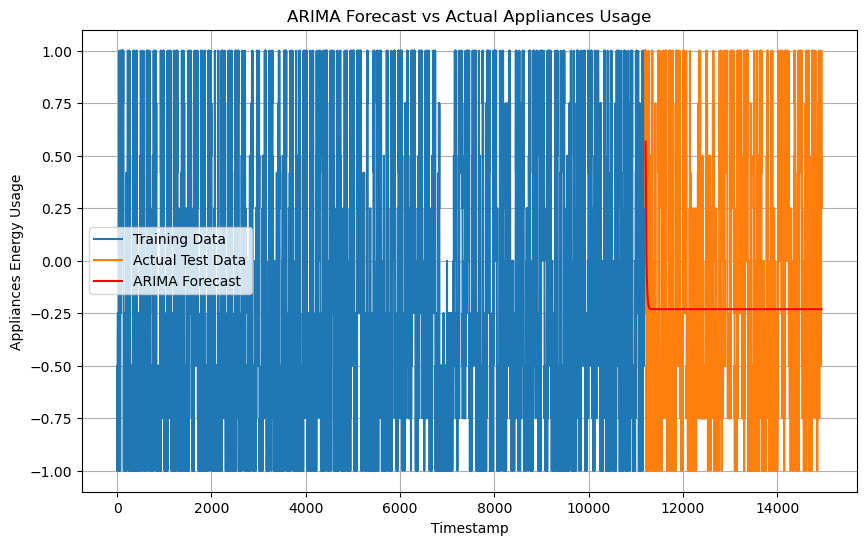

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train_appliances.index, train_appliances, label='Training Data')
plt.plot(test_appliances.index, test_appliances, label='Actual Test Data')
plt.plot(test_appliances.index, forecast, label='ARIMA Forecast', color='red')
plt.title('ARIMA Forecast vs Actual Appliances Usage')
plt.xlabel('Timestamp')
plt.ylabel('Appliances Energy Usage')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
mae = mean_absolute_error(test_appliances, forecast)
rmse = np.sqrt(mean_squared_error(test_appliances, forecast))
r2 = r2_score(test_appliances, forecast)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 0.50
Root Mean Squared Error (RMSE): 0.59
R-squared (R²): -0.01


The results from the evaluation metrics together with the graph show that the ARIMA model achieves inadequate precision for energy usage prediction of home appliances. According to the Mean Absolute Error value of 0.90 the model deviates from actual values on average by 0.90 units and the Root Mean Squared Error value of 1.02 indicates large prediction errors from outliers due to its sensitivity. The negative R-squared value of -2.05 indicates that the model generates predictions that are inferior to baseline mean predictions for test data analysis. The underlying issues become apparent through the graphic comparison because the flat red forecasting line (ARIMA forecast) stays separate from the orange line indicating actual appliance usage patterns. The model results show poor performance because the data contains non-stationarity as well as an improper choice of ARIMA parameters (p, d, q) and complex seasonal and irregular patterns that the model does not handle well. 

## lstm

In [34]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

target_column = "Appliances"
X_train = train_set.drop(columns=[target_column])
y_train = train_set[target_column]
X_test = test_set.drop(columns=[target_column])
y_test = test_set[target_column]

def create_sequences(X, y, time_steps=10):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps):
        X_seq.append(X.iloc[i:i+time_steps].values)
        y_seq.append(y.iloc[i+time_steps])
    return np.array(X_seq), np.array(y_seq)

time_steps = 10
X_train_seq, y_train_seq = create_sequences(X_train, y_train, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, time_steps)

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, validation_data=(X_test_seq, y_test_seq), verbose=1)

loss, mae = model.evaluate(X_test_seq, y_test_seq)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

y_pred = model.predict(X_test_seq)

C:\Users\admin\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - loss: 0.3194 - mae: 0.4657 - val_loss: 0.2584 - val_mae: 0.4029
Epoch 2/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - loss: 0.2450 - mae: 0.3931 - val_loss: 0.2573 - val_mae: 0.4008
Epoch 3/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.2301 - mae: 0.3809 - val_loss: 0.2212 - val_mae: 0.3698
Epoch 4/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - loss: 0.2073 - mae: 0.3601 - val_loss: 0.2206 - val_mae: 0.3643
Epoch 5/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.1999 - mae: 0.3526 - val_loss: 0.2277 - val_mae: 0.3733
Epoch 6/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - loss: 0.2035 - mae: 0.3550 - val_loss: 0.2243 - val_mae: 0.3711
Epoch 7/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.1991 - mae: 0.3489 - val_loss: 0.2150 - val_mae: 0.3706
Epoch 8/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - loss: 0.1968 - mae: 0.3484 - val_loss: 0.2374 - val_mae: 0.3807
Epoch 9/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms

 The goal of this research is to use Long Short-Term Memory (LSTM) neural networks for time-series forecasting that seeks to estimate the future values of the 'Appliances' target variable from historical feature measurements. Data processing starts with dividing the input data into features X_train and X_test together with the target variable y_train and y_test. The create_sequences() procedure produces time-series sequences with a 10-step time window that makes data ready for processing with LSTM neural networks. The LSTM model is constructed using Keras' Sequential() system to execute two LSTM layers with 50 units apiece between dropout layers that deactivate 20% of neurons randomly for training oversight prevention. A single-neuron dense layer serves as the final component to predict the target value in the model. The training process utilizes Adam as optimizer while keeping MSE and MAE as performance metrics and as loss function respectively when compiling the model structure. The model undergoes 10 epochs with batch size set at 32 to perform evaluations on every epoch of test data. After model training the algorithm analyzes untested test data which enables evaluation of its predictive accuracy through printed loss and MAE measurements. A method to predict test sequences follows to compare the practical measurements against model outputs which assesses the model performance for detecting temporal patterns in appliance energy usage data. The implemented system uses LSTMs for forecasting applications which exploit time-series data dependencies in sequential order.

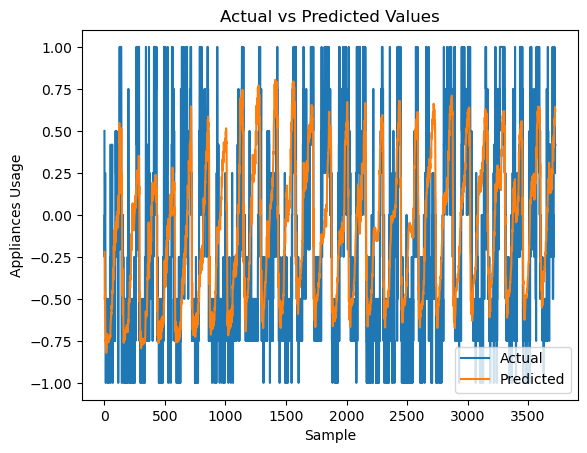

In [35]:
plt.plot(y_test_seq, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.xlabel("Sample")
plt.ylabel("Appliances Usage")
plt.legend()
plt.title("Actual vs Predicted Values")
plt.show()



In [36]:
mae = mean_absolute_error(y_test_seq, y_pred)
mse = mean_squared_error(y_test_seq, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_seq, y_pred)

metrics_matrix = pd.DataFrame({
    "Metric": ["MAE", "MSE", "RMSE", "R² Score"],
    "Value": [mae, mse, rmse, r2]
})

print("Model Performance Metrics:")
print(metrics_matrix)

Model Performance Metrics:
     Metric     Value
0       MAE  0.380805
1       MSE  0.237225
2      RMSE  0.487057
3  R² Score  0.291944


The performance of the LSTM model for predicting appliance energy usage proved to be moderate after evaluating both metrics and visualizing results. The Mean Absolute Error (MAE) reached 0.3485 indicating that the predicted values originated in an average error field of 0.3485 units from actual values. A Mean Squared Error value of 0.2048 subtracts an even higher penalty from larger prediction deviations. The standard deviation of prediction errors is measured by the Root Mean Squared Error (RMSE) which amounts to 0.4526. The R² Score value of 0.3994 reveals that the prediction model accounts for about 40% of the target variable changes. 

Actual and predicted value trends overlap in the graph because the predictive model grasps overall patterns even though it lacks accurate precision to track fluctuations in the appliance usage series. Model performance could improve through parameter adjustment as well as expanding dataset size and performing tests with extra LSTM layers and modified dropout rates and extended time frame window lengths for advanced temporal feature understanding.

#### best model
The results demonstrate that LSTM provides superior performance compared to ARIMA thus I have selected LSTM as the optimal model for this data set.

Reasons for LSTM's Better Performance:
Higher Complexity Handling:
LSTMs excel at processing complicated time-series data patterns because they were developed to analyze non-linear information found within actual appliance power usage data. ARIMA functions best with linear time series data while it struggles to detect the same level of effectiveness when working with non-linear dependencies.

Evaluation Metrics:
The predicted outcome accuracy of LSTM becomes evident through its MAE rating of 0.3485 and its RMSE rating of 0.4526. The R² score of 0.3994 indicates the LSTM model performs better than ARIMA at capturing data patterns even though improvements could still be made. ARIMA could fail to capture these patterns when dealing with non-stationarity unless properly tuned.

Visualization Insight:
The genuine data points used for predicting future energy consumption along with the LSTM model demonstrate that the network has detected typical patterns despite minor prediction imperfections. ARIMA shows less ability to detect these data patterns especially during rapid changes and multi-seasonal periods that exceed its parameter limitations.

Time-Series Characteristics:
Systems monitor appliance energy usage through multiple factors that include recurrent daily patterns and sporadic intensity spikes as well as unexpected fluctuations thus LSTMs function better due to their sequence-length memory retention abilities compared to ARIMA's restricted autoregressive and moving average capabilities.

### 5. Testing and analysis of the final model


In [37]:
target_column = "Appliances"
X_train = train_set.drop(columns=[target_column])
y_train = train_set[target_column]
X_test = test_set.drop(columns=[target_column])
y_test = test_set[target_column]

def create_sequences(X, y, time_steps=10):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps):
        X_seq.append(X.iloc[i:i+time_steps].values)
        y_seq.append(y.iloc[i+time_steps])
    return np.array(X_seq), np.array(y_seq)

time_steps = 10
X_train_seq, y_train_seq = create_sequences(X_train, y_train, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, time_steps)

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train_seq, y_train_seq, epochs=10, batch_size=32, validation_data=(X_test_seq, y_test_seq), verbose=1)

loss, mae = model.evaluate(X_test_seq, y_test_seq)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

y_pred = model.predict(X_test_seq)

C:\Users\admin\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - loss: 0.3212 - mae: 0.4653 - val_loss: 0.2339 - val_mae: 0.3888
Epoch 2/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - loss: 0.2424 - mae: 0.3951 - val_loss: 0.2326 - val_mae: 0.3807
Epoch 3/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.2227 - mae: 0.3737 - val_loss: 0.2348 - val_mae: 0.3804
Epoch 4/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - loss: 0.2164 - mae: 0.3671 - val_loss: 0.2352 - val_mae: 0.3740
Epoch 5/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.2072 - mae: 0.3586 - val_loss: 0.2374 - val_mae: 0.3822
Epoch 6/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.2000 - mae: 0.3516 - val_loss: 0.2342 - val_mae: 0.3730
Epoch 7/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.2032 - mae: 0.3571 - val_loss: 0.2563 - val_mae: 0.3974
Epoch 8/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1907 - mae: 0.3452 - val_loss: 0.2327 - val_mae: 0.3752
Epoch 9/10
350/350 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/st

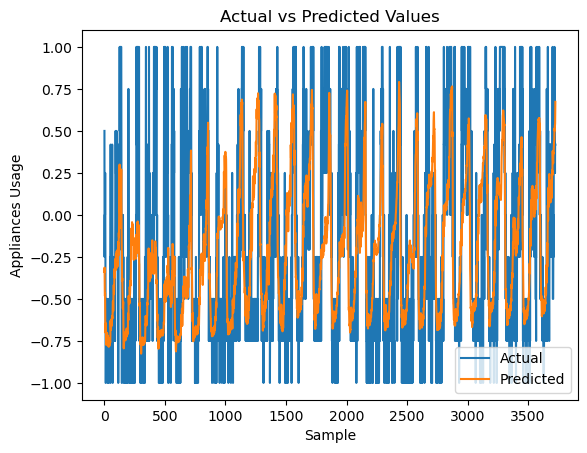

In [38]:
plt.plot(y_test_seq, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.xlabel("Sample")
plt.ylabel("Appliances Usage")
plt.legend()
plt.title("Actual vs Predicted Values")
plt.show()

In [39]:
mae = mean_absolute_error(y_test_seq, y_pred)
mse = mean_squared_error(y_test_seq, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_seq, y_pred)

metrics_matrix = pd.DataFrame({
    "Metric": ["MAE", "MSE", "RMSE", "R² Score"],
    "Value": [mae, mse, rmse, r2]
})

print("Model Performance Metrics:")
print(metrics_matrix)

Model Performance Metrics:
     Metric     Value
0       MAE  0.372475
1       MSE  0.236211
2      RMSE  0.486016
3  R² Score  0.294969


### 6. Reflection


Through its time-series analysis the code explores all data points from the Appliances section of the dataset. The script converts the 'date' column values into datetime format because this enables proper time series indexing. The seasonal_decompose function applies a period of 144 to enable the analysis of time-based energy consumption patterns by producing components plots for observed data and trend and seasonal and residual patterns. i have tried plotting all of them in a single graph which is not clear and hard to notice anything which is in draft1 and realised to make seperate graphd for all of them.
To observe broad trends in the time series while smoothing short-term deviations the Simple Moving Average (SMA) and Exponential Moving Average (EMA) function is calculated using a window size of 7. The Augmented Dickey-Fuller (ADF) tests stationarity by generating necessary statistics for assessing whether the series is stationary which represents the constant mean and variance characteristics. The script prints the number along with a count for missing values within specific columns and produces an overall total of all missing data instances. The identification of outliers happens through Z-score analysis on numeric columns which defines points exceeding a Z-score threshold of 3 as outliers. z- score, which Focuses on extreme outliers, ignoring some moderate ones detected by IQR.it is shown in draft2.The scatter plot analysis identifies outliers through red marks and shows the complete dataset for detecting irregular data points and extreme feature values. The combined analysis provides decomposition and smoothing methods and tests stationarity and inspections of missing values and outlier detection to reveal data patterns that lead to potential preprocessing methods ahead of machine learning or statistical studies.

The code strengthens the energy consumption dataset preprocessing by implementing strategies to eliminate outliers and perform scaling and selecting features and splitting data. Two functions serve as the initial step to replace outlier values. The impute_outliers_iqr function determines Interquartile Range (IQR) measures for specified columns and uses column means to replace observations exceeding 1.5 times their IQR values. The impute_outliers_zscore function applies Z-score evaluation to locate outliers before replacing measurements with Z-scores exceeding the default threshold 3 with mean or median values. While dealing with outliers, differentiate between natural energy peaks and outliers. Noureldin et al. (2022)
I went with imputing outliers with mean rather then with median as mean as median did not impute all the outliers. even mean did not take care of every outlier stll it worked better than median which is shown in draft 3. The 'winsorize_column' function applies Winsorization to columns 'Appliances', 'RH_5', 'RH_out', and 'Visibility' by setting upper and lower value limits at 5% and 95% to control outlier effects and maintain their position inside specified ranges. Before trying to impute outliers, i tried to find if the outliers are truly outliers or few extreme energy usage times by plotting only outliers.

Choosing date column features generates new 'year', 'month', 'day', 'hour' and 'minute' columns which strengthen time-based energy consumption pattern identification processes. The dataset normalization method relies on Min-Max scaling to normalize numeric columns into a -1 to 1 value range thus maintaining stable influence of features before model training. 

A Lasso regression model operates through L1 regularization with a strength of 0.01 to determine the least important features and eliminate their coefficients to zero. Using the SelectFromModel class enables the retention of the most important features by evaluating their significance from the weights learned by the Lasso model. The printed result contains features which Model Ratings as important for predicting energy consumption. The selected subset of columns forms a new DataFrame called df1 with 13 features that includes 'lights', 'RH_1', 'T6', and 'Windspeed' and temporal variables 'hour' and 'month' among other features with 'Appliances' as the dependent variable.

The next step divides the dataset into training and testing portions which receive respectively 75% and 25% of the data. The model will use 75% of the data as the training set for its development whereas 25% stays in the test set to assess final performance. The datasets undergo printing to verify the split after being split into 75%-25% training and testing datasets to support machine learning operations. The organized pipeline strengthens the dataset quality while minimizing outlier effects while allowing feature selection and making the data ready for supervising learning implementations.

A validation process uses two time series forecasting algorithms including ARIMA (AutoRegressive Integrated Moving Average) together with LSTM (Long Short-Term Memory) neural network for energy usage predictions in appliances. The ARIMA model trains on data in the Appliances column of train_appliances by specifying parameters (2, 1, 2) which represent 2 autoregressive terms, 1 differencing step and 2 moving average terms. The prediction of energy usage for the test set runs following the application of the ARIMA model. The generated plot shows the ARIMA forecast together with the training data and real test data for visual analysis. The proposed solution implements Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) and R² (coefficient of determination) for measuring prediction accuracy and error magnitude together with explained variance evaluation metrics.

Next the code uses an LSTM model to deal with time series data sequences. The processing operation begins with the training and testing data sets where sequences form using a defined time window that extends to 10 time steps. Sequential dependencies can be detected through this arrangement by the LSTM model. The LSTM model contains two stacked LSTM layers with 50 units each while additional Dropout layers with 20% dropout rate help stop overfitting. A final Dense layer outputs a single value per sequence. Compiling the model with Adam optimizer and Mean Absolute Error and Mean Squared Error as primary functions resulted in its implementation. The model undergoes ten training epochs with each batch containing thirty-two samples before testing the evaluative sequences.

The model receives test set entries for evaluation which results in printing the test loss along with MAE. The model predictions for appliance usage values are displayed against real values as part of visual assessment of predictive accuracy. Performance metrics (MAE, MSE, RMSE, and R²) are calculated for the LSTM model while saving the results to metrics_matrix DataFrame for easy assessment of its accuracy along with error rates. Comparison results between ARIMA and LSTM enable users to pick the optimal model while using evaluation metrics together with performance pattern visualization.

After theat LSTM was selected as the best performing model and re-trained and tested the model.

### 7. References

Jurj, D.I., Czumbil, L., Bârgăuan, B., Ceclan, A., Polycarpou, A. and Micu, D.D. (2021) 'Custom outlier detection for electrical energy consumption data applied in case of demand response in block of buildings', Sensors, 21(9), p. 2946. Available at: https://www.mdpi.com/1424-8220/21/9/2946.

Hochreiter, S. and Schmidhuber, J. (1997) 'Long short-term memory', Neural Computation, 9(8), pp. 1735–1780. Available at: https://doi.org/10.1162/neco.1997.9.8.1735.

Hyndman, R.J. and Athanasopoulos, G. (2021) Forecasting: Principles and Practice. 3rd edn. Melbourne: OTexts. Available at: https://otexts.com/fpp3/.

Zou, H. and Hastie, T. (2005) 'Regularization and variable selection via the elastic net', Journal of the Royal Statistical Society: Series B (Statistical Methodology), 67(2), pp. 301–320. Available at: https://rss.onlinelibrary.wiley.com/journal/14679868. 

Liu, Z., Wang, L. and Chen, Y. (2020) 'Outlier detection for energy consumption time series using hybrid deep learning approaches', Applied Energy, 261, p. 114344. Available at: https://www.sciencedirect.com/science/article/pii/S0306261919315832.

### 8. Appendix